In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [2]:
# Reading in dataset
df = pd.read_csv('appdata10.csv')

In [3]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


# Checking for missing values

In [4]:
missing_values = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in missing_values:
    print('{} feature has {} % missing values'.format(feature,df[feature].isnull().mean()))

enrolled_date feature has 0.37852 % missing values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


# Identifying Numerical data

In [6]:
num_feature = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature != 'user' and feature !='enrolled']
print('There are {} numerical features'.format (len(num_feature)))

There are 6 numerical features


# Number of unique labels in numerical features

In [7]:
for feature in num_feature:
    print('{} feature has {} unique labels'.format(feature,df[feature].nunique()))

dayofweek feature has 7 unique labels
age feature has 78 unique labels
numscreens feature has 151 unique labels
minigame feature has 2 unique labels
used_premium_feature feature has 2 unique labels
liked feature has 2 unique labels


# Discrete Numerical feature

In [8]:
disc_num_feature = [feature for feature in num_feature if df[feature].nunique() <=7 and feature != 'dayofweek']
print('There are {} discrete numerical feature'.format(len(disc_num_feature)))

There are 3 discrete numerical feature


# Visualize the Discrete Numeric features

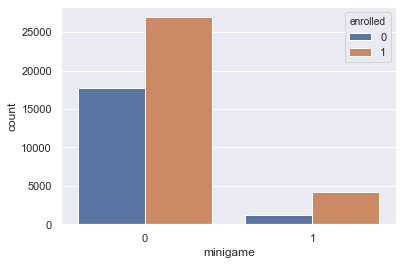

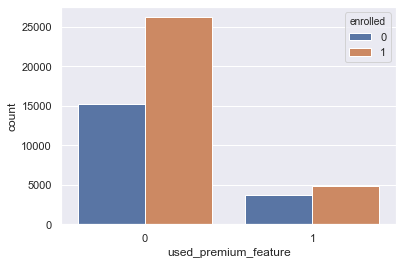

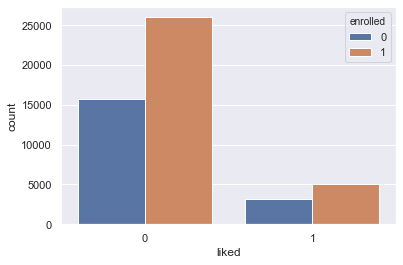

In [9]:
for feature in disc_num_feature:
    data = df.copy()
    sns.countplot(x=feature,data=data,hue='enrolled')
    plt.show()

# Continuous Variables

In [10]:
conti_num_feature = [feature for feature in num_feature if feature not in disc_num_feature and feature != 'dayofweek']
print('There are {} continuous numerical feature'.format(len(conti_num_feature)))

There are 2 continuous numerical feature


# Visualize Continuous Numerical Data

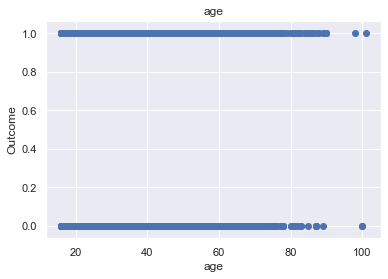

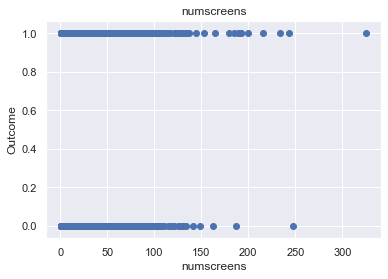

In [11]:
for feature in conti_num_feature:
    data=df.copy()
    plt.scatter(data[feature],data['enrolled'])
    plt.xlabel(feature)
    plt.ylabel('Outcome')
    plt.title(feature)
    plt.show()
    

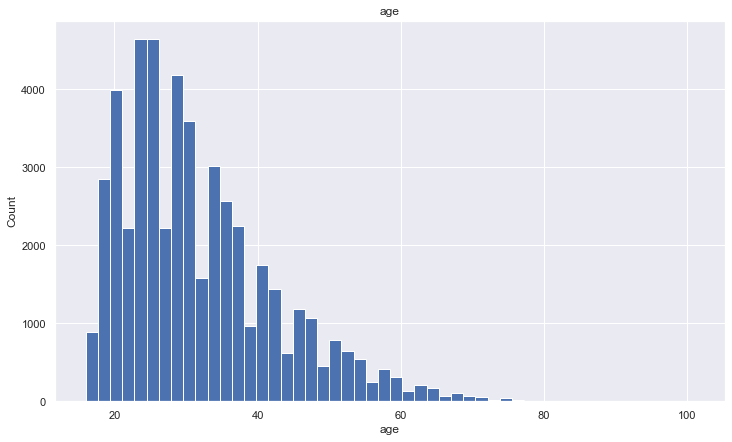

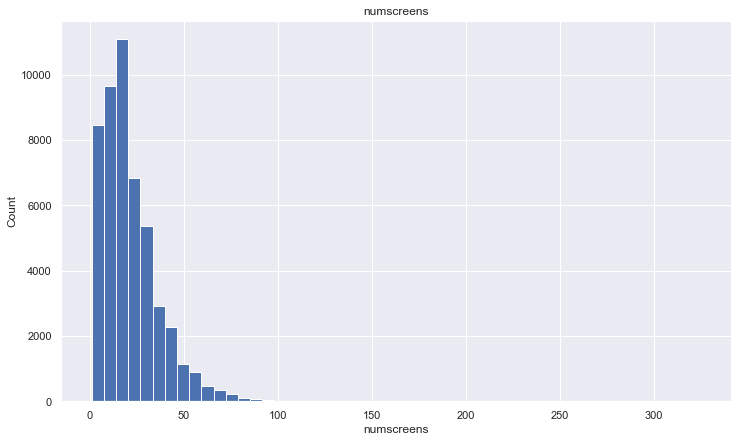

In [12]:
for feature in conti_num_feature:
    plt.figure(figsize=(12,7))
    data=df.copy()
    data[feature].hist(bins=50)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()
    
# Take note skewed distirbution observed best to apply log transform 

# Temporal data

In [13]:
feature_temporal = ['first_open','dayofweek','hour','enrolled_date']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [15]:
df.head(1)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0


# Minor Feature Engineering for temporal data

In [16]:
from dateutil import parser

In [17]:
# Convert "first_open" and "enrolled data" features to datetime
df['first_open'] = df['first_open'].apply(lambda x: parser.parse(x))
df['enrolled_date'] = df['enrolled_date'].apply(lambda x: parser.parse(x) if isinstance(x,str) else x)

In [18]:
# Convert hour column to usable integer data
df['hour'] = df.hour.str.slice(0,3).astype(int)

In [19]:
df

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaT,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaT,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


# Visualizing Temporal data

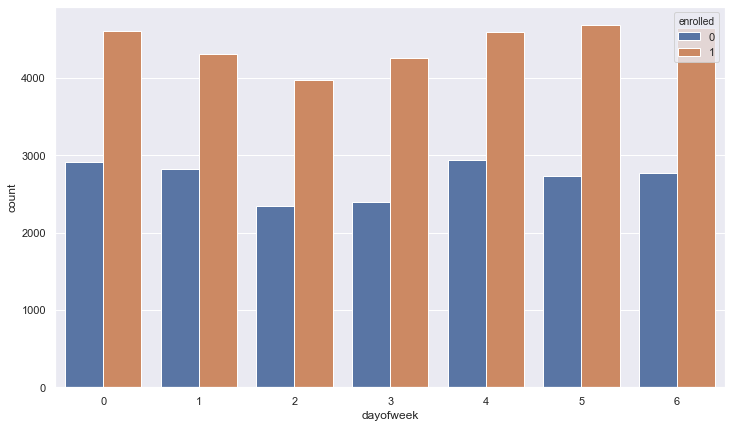

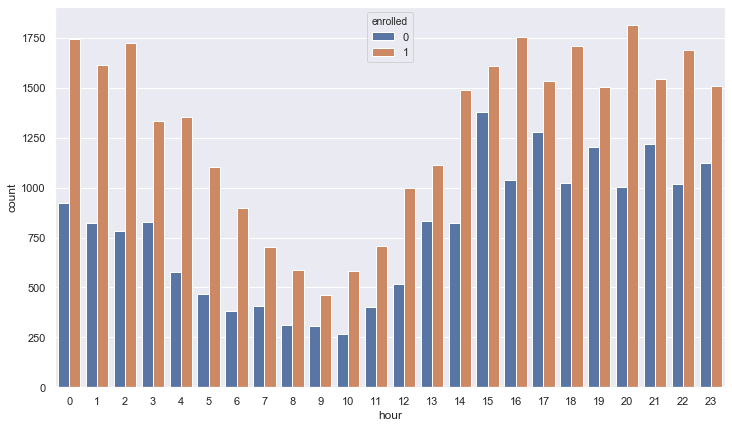

In [20]:
# Time of week component and hours we can use count plot
for feature in ['dayofweek','hour']:
    plt.figure(figsize=(12,7))
    sns.countplot(x=feature,data=df,hue='enrolled')
    plt.show()

# Feature Engineering

In [21]:
# Using the 'first_open' and 'enrolled_date' feature to find time taken for customer to enrolled
df['Enrollment time'] = (df.enrolled_date -df.first_open).astype('timedelta64[h]')

In [22]:
data_preprocess = df.copy()

In [23]:
# Applying long transform for age and numscreen columns
for feature in conti_num_feature:
    data_preprocess[feature] =np.log(data_preprocess[feature])

In [24]:
data_preprocess

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Enrollment time
0,235136,2012-12-27 02:14:51.273,3,2,3.135494,"idscreen,joinscreen,Cycle,product_review,ScanP...",2.708050,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,3.178054,"joinscreen,product_review,product_review2,Scan...",2.564949,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,3.135494,"Splash,Cycle,Loan",1.098612,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,3.332205,"product_review,Home,product_review,Loan3,Finan...",3.688879,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,3.433987,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",3.465736,0,0,1,2013-02-26 18:56:37.841,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,3.465736,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",2.564949,0,0,1,2013-05-09 13:47:52.875,0,0.0
49996,169179,2013-04-09 00:05:17.823,1,0,3.555348,"Cycle,Splash,Home,RewardsContainer",1.386294,0,1,0,NaT,0,NaN
49997,302367,2013-02-20 22:41:51.165,2,22,3.663562,"joinscreen,product_review,product_review2,Scan...",3.218876,0,0,0,NaT,0,NaN
49998,324905,2013-04-28 12:33:04.288,6,12,3.295837,"Cycle,Home,product_review,product_review,produ...",3.258097,0,0,1,2013-04-28 12:35:38.709,0,0.0


In [25]:
# Drop 'first_open' and 'enrolled_date' columns
data_preprocess.drop(['first_open','enrolled_date'],axis=1,inplace=True)

In [26]:
data_preprocess

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Enrollment time
0,235136,3,2,3.135494,"idscreen,joinscreen,Cycle,product_review,ScanP...",2.708050,0,0,0,0,NaN
1,333588,6,1,3.178054,"joinscreen,product_review,product_review2,Scan...",2.564949,0,0,0,0,NaN
2,254414,1,19,3.135494,"Splash,Cycle,Loan",1.098612,0,1,0,1,NaN
3,234192,4,16,3.332205,"product_review,Home,product_review,Loan3,Finan...",3.688879,0,0,1,0,0.0
4,51549,1,18,3.433987,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",3.465736,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,3.465736,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",2.564949,0,0,1,0,0.0
49996,169179,1,0,3.555348,"Cycle,Splash,Home,RewardsContainer",1.386294,0,1,0,0,NaN
49997,302367,2,22,3.663562,"joinscreen,product_review,product_review2,Scan...",3.218876,0,0,0,0,NaN
49998,324905,6,12,3.295837,"Cycle,Home,product_review,product_review,produ...",3.258097,0,0,1,0,0.0


In [27]:
data_preprocess.drop('user',axis=1,inplace=True)

In [28]:
data_preprocess

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Enrollment time
0,3,2,3.135494,"idscreen,joinscreen,Cycle,product_review,ScanP...",2.708050,0,0,0,0,NaN
1,6,1,3.178054,"joinscreen,product_review,product_review2,Scan...",2.564949,0,0,0,0,NaN
2,1,19,3.135494,"Splash,Cycle,Loan",1.098612,0,1,0,1,NaN
3,4,16,3.332205,"product_review,Home,product_review,Loan3,Finan...",3.688879,0,0,1,0,0.0
4,1,18,3.433987,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",3.465736,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...
49995,3,13,3.465736,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",2.564949,0,0,1,0,0.0
49996,1,0,3.555348,"Cycle,Splash,Home,RewardsContainer",1.386294,0,1,0,0,NaN
49997,2,22,3.663562,"joinscreen,product_review,product_review2,Scan...",3.218876,0,0,0,0,NaN
49998,6,12,3.295837,"Cycle,Home,product_review,product_review,produ...",3.258097,0,0,1,0,0.0


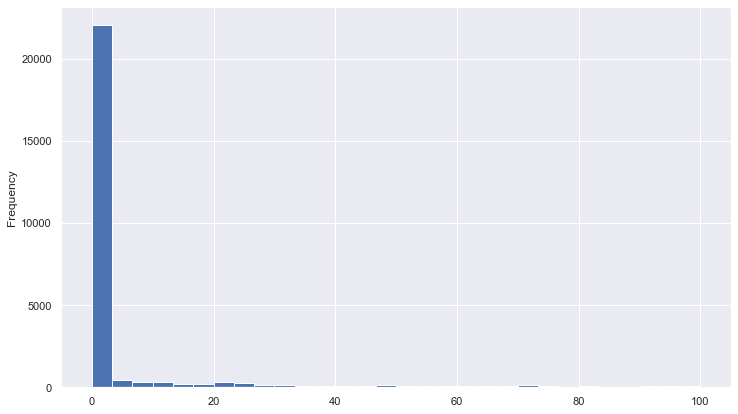

In [29]:
# Visulize time taken for customer to enroll
plt.figure(figsize=(12,7))
data_preprocess['Enrollment time'].plot.hist(bins=30,range =[0,100])


In [30]:
len(data_preprocess[data_preprocess['Enrollment time'] <=48])

24850

In [31]:
# Looking at the distribution majority of the customer enrolled within 3 hours off opening the app
# Set threshold for prediction of enrollment to 3 hours
def treshold(time):
    if time <= 48:
        return 1
    else:
        return 0

In [32]:
data_preprocess['Enrollment time'] = data_preprocess['Enrollment time'].apply(treshold)

In [33]:
len(data_preprocess[data_preprocess['Enrollment time']==1])

24850

In [34]:
data_preprocess

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Enrollment time
0,3,2,3.135494,"idscreen,joinscreen,Cycle,product_review,ScanP...",2.708050,0,0,0,0,0
1,6,1,3.178054,"joinscreen,product_review,product_review2,Scan...",2.564949,0,0,0,0,0
2,1,19,3.135494,"Splash,Cycle,Loan",1.098612,0,1,0,1,0
3,4,16,3.332205,"product_review,Home,product_review,Loan3,Finan...",3.688879,0,0,1,0,1
4,1,18,3.433987,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",3.465736,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,3,13,3.465736,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",2.564949,0,0,1,0,1
49996,1,0,3.555348,"Cycle,Splash,Home,RewardsContainer",1.386294,0,1,0,0,0
49997,2,22,3.663562,"joinscreen,product_review,product_review2,Scan...",3.218876,0,0,0,0,0
49998,6,12,3.295837,"Cycle,Home,product_review,product_review,produ...",3.258097,0,0,1,0,1


In [35]:
# Load in top_screen data
top_screen = pd.read_csv('top_screens.csv').top_screens.values

In [36]:
top_screen

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [37]:
data_preprocess['screen_list'] = data_preprocess.screen_list.astype(str)+','
data_preprocess['screen_list'][1]

'joinscreen,product_review,product_review2,ScanPreview,VerifyDateOfBirth,location,VerifyCountry,VerifyPhone,VerifyToken,Institutions,Loan2,'

In [38]:
for sc in top_screen:
    data_preprocess[sc] = data_preprocess.screen_list.str.contains(sc).astype(int)
    data_preprocess['screen_list'] = data_preprocess.screen_list.str.replace(sc+',','')

In [39]:
data_preprocess['screen_list'][1]

'joinscreen,product_review,product_review2,ScanPreview,VerifyToken,'

In [40]:
data_preprocess['Other'] = data_preprocess.screen_list.str.count(',')

In [41]:
data_preprocess.drop('screen_list',axis=1,inplace=True)

In [42]:
data_preprocess

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Enrollment time,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,Other
0,3,2,3.135494,2.708050,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,6,1,3.178054,2.564949,0,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,1,19,3.135494,1.098612,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,3.332205,3.688879,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,1,18,3.433987,3.465736,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,13,3.465736,2.564949,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6
49996,1,0,3.555348,1.386294,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
49997,2,22,3.663562,3.218876,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
49998,6,12,3.295837,3.258097,0,0,1,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13


In [43]:
# Check point
data_final = data_preprocess.copy()

In [44]:
# Creating funnel to group similar labels 

# Funnels
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
data_final["SavingCount"] = data_final[savings_screens].sum(axis=1)
data_final = data_final.drop(columns=savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
data_final["CMCount"] = data_final[cm_screens].sum(axis=1)
data_final= data_final.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
data_final["CCCount"] =data_final[cc_screens].sum(axis=1)
data_final = data_final.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data_final["LoansCount"] = data_final[loan_screens].sum(axis=1)
data_final = data_final.drop(columns=loan_screens)


In [45]:
data_final

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Enrollment time,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,3,2,3.135494,2.708050,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,6,1,3.178054,2.564949,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,1,19,3.135494,1.098612,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,16,3.332205,3.688879,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,1,18,3.433987,3.465736,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,13,3.465736,2.564949,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,1,0,3.555348,1.386294,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,2,22,3.663562,3.218876,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,6,12,3.295837,3.258097,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


In [46]:
data_final = pd.concat([df['user'],data_final],axis=1)

In [47]:
data_final

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Enrollment time,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,3.135494,2.708050,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,3.178054,2.564949,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,3.135494,1.098612,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,3.332205,3.688879,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,3.433987,3.465736,0,0,1,1,1,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,3.465736,2.564949,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0,2,0,0
49996,169179,1,0,3.555348,1.386294,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,3.663562,3.218876,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,3.295837,3.258097,0,0,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,0


# Splitting Data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = data_final.drop(['user','enrolled'],axis=1)
y = data_final['enrolled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Scale the data

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
X_train1 = pd.DataFrame(scaler.fit_transform(X_train),columns=[X_train.columns.values])
X_test1 = pd.DataFrame(scaler.transform(X_test),columns=[X_test.columns.values])
X_train = X_train1
X_test=X_test1

In [53]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,Enrollment time,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,-0.016963,-1.423352,-0.343044,1.673470,-0.347909,-0.457875,2.249579,1.005961,0.961594,-0.644781,0.949502,1.453537,1.052038,2.300833,-0.860129,-0.754517,1.392818,-0.503034,-0.303499,-0.227408,3.479038,-0.279732,-0.232572,-0.238986,4.605228,-0.177325,4.801560,4.460440,0.0,4.576415,4.824090,-0.155661,-0.163199,6.444171,-0.182237,-0.151569,-0.175171,-0.14808,-0.331213,-0.118912,-0.11767,-0.115784,-0.091564,-0.086679,0.482797,3.293642,1.697277,-0.288819,0.309798
1,-1.002348,0.326726,-1.283354,0.282352,-0.347909,-0.457875,-0.444528,-0.994075,-1.039940,1.550913,-1.053184,-0.687977,-0.950536,-0.434625,-0.860129,1.325352,1.392818,1.987938,-0.303499,-0.227408,-0.287436,-0.279732,-0.232572,-0.238986,-0.217145,-0.177325,-0.208266,-0.224193,0.0,-0.218512,-0.207293,-0.155661,-0.163199,-0.155179,-0.182237,-0.151569,-0.175171,-0.14808,-0.331213,-0.118912,-0.11767,-0.115784,-0.091564,-0.086679,-0.331690,-0.259698,0.057577,-0.288819,0.309798
2,-1.002348,0.595969,0.089819,0.090538,-0.347909,-0.457875,-0.444528,-0.994075,-1.039940,1.550913,0.949502,-0.687977,-0.950536,2.300833,-0.860129,-0.754517,-0.717969,-0.503034,-0.303499,-0.227408,-0.287436,-0.279732,-0.232572,-0.238986,4.605228,-0.177325,-0.208266,-0.224193,0.0,-0.218512,-0.207293,-0.155661,-0.163199,-0.155179,-0.182237,-0.151569,-0.175171,-0.14808,-0.331213,-0.118912,-0.11767,-0.115784,-0.091564,-0.086679,-1.146178,4.004311,0.057577,-0.288819,0.309798
3,-0.016963,0.999833,-0.343044,-0.535741,-0.347909,-0.457875,-0.444528,-0.994075,0.961594,-0.644781,-1.053184,-0.687977,-0.950536,-0.434625,-0.860129,1.325352,1.392818,1.987938,-0.303499,-0.227408,-0.287436,-0.279732,-0.232572,-0.238986,-0.217145,-0.177325,-0.208266,-0.224193,0.0,-0.218512,-0.207293,-0.155661,-0.163199,-0.155179,-0.182237,-0.151569,-0.175171,-0.14808,-0.331213,-0.118912,-0.11767,-0.115784,-0.091564,-0.086679,-0.874682,-0.259698,-0.762273,-0.288819,-1.165633
4,-1.495041,0.999833,-0.119144,-0.956709,2.874319,-0.457875,-0.444528,1.005961,-1.039940,-0.644781,-1.053184,-0.687977,-0.950536,-0.434625,-0.860129,-0.754517,1.392818,-0.503034,-0.303499,-0.227408,-0.287436,-0.279732,-0.232572,-0.238986,-0.217145,-0.177325,-0.208266,-0.224193,0.0,-0.218512,-0.207293,-0.155661,-0.163199,-0.155179,-0.182237,-0.151569,-0.175171,-0.14808,-0.331213,-0.118912,-0.11767,-0.115784,-0.091564,-0.086679,-0.603186,-0.259698,-0.762273,-0.288819,0.309798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.968423,1.403698,-1.444070,-1.138647,-0.347909,-0.457875,-0.444528,-0.994075,-1.039940,-0.644781,-1.053184,-0.687977,1.052038,-0.434625,1.162616,-0.754517,1.392818,1.987938,-0.303499,-0.227408,-0.287436,-0.279732,-0.232572,-0.238986,-0.217145,-0.177325,-0.208266,-0.224193,0.0,-0.218512,-0.207293,-0.155661,-0.163199,-0.155179,-0.182237,-0.151569,-0.175171,-0.14808,-0.331213,-0.118912,-0.11767,-0.115784,-0.091564,-0.086679,-1.146178,-0.259698,-0.762273,-0.288819,-1.165633
34996,-1.495041,0.326726,-0.984721,-1.617201,2.874319,2.184002,-0.444528,-0.994075,-1.039940,-0.644781,-1.053184,-0.687977,-0.950536,-0.434625,-0.860129,-0.754517,-0.717969,-0.503034,-0.303499,-0.227408,-0.287436,-0.279732,-0.232572,-0.238986,-0.217145,-0.177325,-0.208266,-0.224193,0.0,-0.218512,-0.207293,6.424214,-0.163199,-0.1

# Model Building  ( We will study the performance of 3 model) 
    Note: We wont conduct any hyper-parameter tuning

In [54]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model = LogisticRegression(random_state=0,penalty='l1')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results1=pd.DataFrame([['Logistic Regression' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])
results1


C:\Users\Shangar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.8864,0.902316,0.970048,0.843425


In [55]:
# Usign SVM Model

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model =SVC(random_state=0,kernel='rbf')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results=pd.DataFrame([['SVC RBF' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results,ignore_index=True)

C:\Users\Shangar\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [56]:
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.886400,0.902316,0.970048,0.843425
1,SVC RBF,0.887267,0.902900,0.972538,0.842568


In [57]:
# Trying with Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model =RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
acc = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions)
pc = precision_score(y_test,predictions)
rec =recall_score(y_test,predictions)

results=pd.DataFrame([['Random Forest(n=100)' ,acc,f1,pc,rec]],columns=['Model','accuracy','f1_score','precision','recall_score'])

results1= results1.append(results,ignore_index=True)

In [58]:
results1

,Model,accuracy,f1_score,precision,recall_score
0,Logistic Regression,0.886400,0.902316,0.970048,0.843425
1,SVC RBF,0.887267,0.902900,0.972538,0.842568
2,Random Forest(n=100),0.894733,0.910937,0.961538,0.865395


# Using Cross Validation to ensure  Random Forest Model performance

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
accuracy = cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
print(accuracy.mean())
print(accuracy.std()*2)

0.8938284028734556
0.008372234498792779
